In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator as interpolate
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D
from PointSet import *

from DelaunayDemo import * # only works for plotting 3D delaunay triangulations

# Two Dimensional Interpolation

### Test Case 1 - Equilateral Triangle

array([[0.        , 0.        ],
       [2.        , 3.46410162],
       [4.        , 0.        ]])

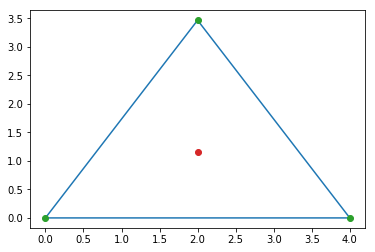

In [2]:
points = np.array([[0, 0], [2, (np.sqrt(3)/2)*4], [4, 0]]) # making points for an equilateral triangle
tri = Delaunay(points) # creating delaunay triangulation
plot_delaunay_2D(tri)
tri_indx = 0 # index of triangle whose centroid we want to plot
plt.plot(centroid(tri, tri_indx)[0], centroid(tri, tri_indx)[1], 'o') # plotting centroid point 
tri.points

In [3]:
f = interpolate(tri, [100,100,100]) # argument form: (delaunay triangulation, vertex values)
f.__call__([centroid(tri, tri_indx)[0], centroid(tri, tri_indx)[1]])

array([100.])

### It is working! The value at the centroid is 100!

In [4]:
f = interpolate(tri, [100,0,100]) # argument form: (delaunay triangulation, vertex values)
f.__call__([centroid(tri, tri_indx)[0], centroid(tri, tri_indx)[1]])

array([66.66666667])

In [5]:
f.__call__([centroid(tri, tri_indx)[0] + 1, centroid(tri, tri_indx)[1]]) # adding 1 to x coordinate shifts point to the right

array([66.66666667])

### Very good! The upper vertex is assigned a value of 0, and motion on the line perpendicular to it does not effect the value

# Electric Field Interpolation

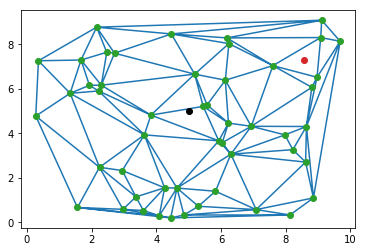

In [6]:
x_grid_amp = 10
y_grid_amp = 10
num_points = 50
points = generate_rand_points([x_grid_amp, y_grid_amp], num_points) # argument form: (dimension_amplitudes, number of points)
tri = Delaunay(points) # creating delaunay triangulation
# plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
# plt.plot(points[:,0], points[:,1], 'o') # plotting corner points
plot_delaunay_2D(tri)
tri_indx = 20 # index of triangle whose centroid we want to plot
plt.plot(centroid(tri, tri_indx)[0], centroid(tri, tri_indx)[1], 'o') # plotting random point 
plt.plot(x_grid_amp / 2, y_grid_amp / 2, 'ko') # plotting centroid point 

### We know there is a point charge at the black point. We have sampled the electric field in its vicinity, and we would like to know the electric field at some random point (the red point)

### Creating point charge 

In [23]:
charge_magnitude = 5 # units of Coulombs
charge_loc = np.array([x_grid_amp / 2, y_grid_amp / 2])
        
point_charge = PointCharge(charge_loc, charge_magnitude) # creating a point charge

point_charge.charge_loc, point_charge.charge_magnitude

(array([5., 5.]), 5)

### Calculating Electric Field for grid points

In [24]:
E_field = electric_field(point_charge, tri.points)

In [29]:
f = interpolate(tri, E_field) # argument form: (delaunay triangulation, vertex values)
f.__call__([2,2])

array([2.6782711e+09])

In [26]:
def determine_Error(points):
    '''This function takes an array of points as an argument. The values of electric field are calculated at each point
    using the formula: E = (k*q) / r**2. Then, the values are calculated at the points using delaunay interpolation. 
    The error between the actual value of E and interpolated value of E is returned. i.e. interpolated_E - actual_E is returned'''

array(1.27963934e+11)